In [ ]:
from qiskit import QuantumCircuit

# Create a 5-qubit circuit (q[0] = |ψ⟩, q[1]-q[4] = |0⟩)
qc = QuantumCircuit(5)

# Step 1: S on psi (q[0]), H on q[2], q[3]
qc.s(0)
qc.h(2)
qc.h(3)
qc.barrier()

# Step 2: CNOT q[2] → q[4]
qc.cx(2, 4)
qc.barrier()

# Step 3: CNOT q[3] → q[1]
qc.cx(3, 1)
qc.barrier()

# Step 4: H on q[1], CNOT q[3] → q[4]
qc.h(1)
qc.cx(3, 4)
qc.barrier()

# Step 5: CNOT q[1] → q[0], S on q[2], q[3], S† on q[4]
qc.cx(1, 0)
qc.s(2)
qc.s(3)
qc.sdg(4)
qc.barrier()

# Step 6: S on q[0], q[1]
qc.s(0)
qc.s(1)
qc.barrier()

# Step 7: CNOT q[4] → q[0]
qc.cx(4, 0)
qc.barrier()

# Step 8: H on q[4]
qc.h(4)
qc.barrier()

# Step 9: CNOT q[4] → q[1]
qc.cx(4, 1)
qc.barrier()

# Draw the circuit
qc.draw('mpl')


In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, state_fidelity
import numpy as np

# --- YOUR ENCODER ---
def your_encoder():
    qc = QuantumCircuit(5)

    # Prepare |+> on qubit 0 (ψ)
    qc.h(0)

    # Step 1
    qc.s(0)
    qc.h(2)
    qc.h(3)
    qc.barrier()

    # Step 2
    qc.cx(2, 4)
    qc.barrier()

    # Step 3
    qc.cx(3, 1)
    qc.barrier()

    # Step 4
    qc.h(1)
    qc.cx(3, 4)
    qc.barrier()

    # Step 5
    qc.cx(1, 0)
    qc.s(2)
    qc.s(3)
    qc.sdg(4)
    qc.barrier()

    # Step 6
    qc.s(0)
    qc.s(1)
    qc.barrier()

    # Step 7
    qc.cx(4, 0)
    qc.barrier()

    # Step 8
    qc.h(4)
    qc.barrier()

    # Step 9
    qc.cx(4, 1)
    qc.barrier()

    # Draw the circuit
    qc.draw('mpl')
    
    return qc

# --- STANDARD 5-QUBIT LOGICAL + STATE (MANUAL CONSTRUCTION) ---
def logical_plus_state():
    # 5-qubit logical |0> and |1> from literature
    logical_zero_vec = (
        Statevector.from_label('00000') +
        Statevector.from_label('10010') +
        Statevector.from_label('01001') +
        Statevector.from_label('10100') +
        Statevector.from_label('01010') -
        Statevector.from_label('11011') -
        Statevector.from_label('00110') -
        Statevector.from_label('11000') -
        Statevector.from_label('11101') -
        Statevector.from_label('00011') -
        Statevector.from_label('11110') -
        Statevector.from_label('01111') -
        Statevector.from_label('10001') -
        Statevector.from_label('01100') -
        Statevector.from_label('10111') +
        Statevector.from_label('00101')
    )

    logical_one_vec = (
        Statevector.from_label('11111') +
        Statevector.from_label('01101') +
        Statevector.from_label('10110') +
        Statevector.from_label('01011') +
        Statevector.from_label('10101') -
        Statevector.from_label('00100') -
        Statevector.from_label('11001') -
        Statevector.from_label('00111') -
        Statevector.from_label('00010') -
        Statevector.from_label('11100') -
        Statevector.from_label('00001') -
        Statevector.from_label('10000') -
        Statevector.from_label('01110') -
        Statevector.from_label('10011') -
        Statevector.from_label('01000') +
        Statevector.from_label('11010')
    )

    # Normalize manually
    logical_zero = logical_zero_vec.data
    logical_zero /= np.linalg.norm(logical_zero)

    logical_one = logical_one_vec.data
    logical_one /= np.linalg.norm(logical_one)

    # Logical |+> = (|0_L⟩ + |1_L⟩)/√2
    logical_plus = (logical_zero + logical_one) / np.sqrt(2)
    
    return Statevector(logical_plus)

# --- RUN & COMPARE ---
your_qc = your_encoder()
encoded_state = Statevector.from_instruction(your_qc)
logical_plus = logical_plus_state()

# Use state_fidelity function
fidelity = state_fidelity(encoded_state, logical_plus)
print(f"Fidelity between your encoder and true logical |+⟩: {fidelity:.10f}")


In [ ]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit

qc = QuantumCircuit(5)

# Build the circuit (same as before)
qc.h(0)
qc.cz(0, 1)
qc.cz(0, 3)
qc.cx(0, 4)
qc.cz(0, 4)
qc.barrier()

qc.h(1)
qc.cz(1, 2)
qc.cz(1, 3)
qc.cx(1, 4)
qc.barrier()

qc.h(2)
qc.cz(2, 0)
qc.cz(2, 1)
qc.cx(2, 4)
qc.barrier()

qc.h(3)
qc.cz(3, 0)
qc.cz(3, 2)
qc.cx(3, 4)
qc.cz(3, 4)
qc.barrier()

qc.draw('mpl')
# Draw with matplotlib, color and style options
# fig = qc.draw('mpl')
# plt.show()

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, state_fidelity
import numpy as np

# 1) Prepare input state |psi> on qubit 0
theta = np.pi / 3
phi = np.pi / 4
alpha = np.cos(theta / 2)
beta = np.exp(1j * phi) * np.sin(theta / 2)

qc = QuantumCircuit(5)
qc.u(theta, phi, 0, 0)  # Arbitrary state on q0

# 2) Your 5-qubit encoding circuit on qubits 0-4
qc.s(0)
qc.h(2)
qc.h(3)
qc.barrier()

qc.cx(2, 4)
qc.barrier()

qc.cx(3, 1)
qc.barrier()

qc.h(1)
qc.cx(3, 4)
qc.barrier()

qc.cx(1, 0)
qc.s(2)
qc.s(3)
qc.sdg(4)
qc.barrier()

qc.s(0)
qc.s(1)
qc.barrier()

qc.cx(4, 0)
qc.barrier()

qc.h(4)
qc.barrier()

qc.cx(4, 1)
qc.barrier()

# 3) Get the encoded output statevector
encoded_state = Statevector.from_instruction(qc)

# 4) Define logical |0_L> and |1_L> of the 5-qubit code

# The 5-qubit code logical |0_L> amplitudes (32 basis states for 5 qubits)
# Index order is |q4 q3 q2 q1 q0>, Qiskit uses q0 as least significant bit,
# so basis states indices are reversed to q0 as LSB:
#
# To get the amplitudes right, flip bits accordingly.
# We'll define dictionary {basis_string: amplitude} then fill a 32 element vector

logical_0_dict = {
    "00000": 1,
    "10010": 1,
    "01001": 1,
    "10100": 1,
    "01010": 1,
    "11011": -1,
    "00110": -1,
    "11000": -1,
    "11101": -1,
    "00011": -1,
    "11110": -1,
    "01111": -1,
    "10001": -1,
    "01100": -1,
    "10111": -1,
    "00101": 1
}

# logical_1 is X on all qubits applied to logical_0:
# For 5 qubit code, logical_1 = X⊗5 |0_L>
logical_1_dict = {}
for bitstr, amp in logical_0_dict.items():
    # flip all bits 0->1, 1->0
    flipped = ''.join('1' if b == '0' else '0' for b in bitstr)
    logical_1_dict[flipped] = amp

# Function to convert bitstring to index with q0 as LSB (least significant bit)
def bitstring_to_index(bstr):
    return int(bstr[::-1], 2)  # reverse for q0 as LSB

# Initialize vectors
dim = 32
logical_0_vec = np.zeros(dim, dtype=complex)
logical_1_vec = np.zeros(dim, dtype=complex)

for bstr, amp in logical_0_dict.items():
    idx = bitstring_to_index(bstr)
    logical_0_vec[idx] = amp

for bstr, amp in logical_1_dict.items():
    idx = bitstring_to_index(bstr)
    logical_1_vec[idx] = amp

# Normalize
logical_0_vec /= np.linalg.norm(logical_0_vec)
logical_1_vec /= np.linalg.norm(logical_1_vec)

logical_0 = Statevector(logical_0_vec)
logical_1 = Statevector(logical_1_vec)

# 5) Build expected encoded state |psi_L> = alpha|0_L> + beta|1_L>
logical_psi = alpha * logical_0 + beta * logical_1

# 6) Compute fidelity
fidelity = state_fidelity(encoded_state, logical_psi)
print(f"Fidelity between encoded state and ideal logical state: {fidelity:.6f}")


THIS IS THE NEW TESTING

In [8]:
import numpy as np
import random
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, AncillaRegister
from qiskit.quantum_info import Statevector, state_fidelity
from qiskit_aer import Aer
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt

# 1. Theoretical logical |+> state for the 5-qubit code
# The logical |+> is (|0_L> + |1_L>)/sqrt(2)
# |0_L> and |1_L> are standard codewords for the 5-qubit code
# See e.g. https://en.wikipedia.org/wiki/Five-qubit_error_correcting_code

# Standard codewords (from literature, up to global phase)
zero_L = (1/4) * (
    np.array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 
              0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0])
    + np.array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 
                1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0])
    + np.array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 
                0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1])
    + np.array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 
                1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0])
)
one_L = (1/4) * (
    np.array([1, 0, 0, 0, 0, -1, 0, -1, 0, 0, -1, 0, 0, -1, -1, 0, 
              0, 0, -1, 0, -1, 0, 0, -1, -1, 0, 0, -1, 0, -1, 0, 0])
    - np.array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 
                1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0])
    + np.array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, -1, 0, -1, 
                0, -1, 0, 0, -1, 0, -1, 0, 0, 0, -1, 0, -1, 0, 0, -1])
    - np.array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, -1, 0, 
                -1, 0, -1, 0, 0, -1, 0, -1, 0, 0, 0, -1, 0, -1, 0, 0])
)
zero_L = zero_L / np.linalg.norm(zero_L)
one_L = one_L / np.linalg.norm(one_L)
plus_L = (zero_L + one_L) / np.sqrt(2)

# 2. Build encoding circuit
data = QuantumRegister(5, "data")
anc = AncillaRegister(1, "anc")
syndrome = ClassicalRegister(4, "syn")
logical = ClassicalRegister(1, "log")
qc = QuantumCircuit(data, anc, syndrome, logical)

qc.h(data[0])
qc.s(data[0])
qc.h(data[2])
qc.h(data[3])
qc.cx(data[2], data[4])
qc.cx(data[3], data[1])
qc.h(data[1])
qc.cx(data[3], data[4])
qc.cx(data[1], data[0])
qc.s(data[2])
qc.s(data[3])
qc.sdg(data[4])
qc.s(data[0])
qc.s(data[1])
qc.cx(data[4], data[0])
qc.h(data[4])
qc.cx(data[4], data[1])
qc.barrier()
print("Step 1: Encoded |+> state into the 5-qubit code.")

# 3. Check: Is the encoded state really logical |+>?
sv = Statevector.from_instruction(qc)
fid = state_fidelity(sv.data, plus_L)
print(f"Fidelity of encoded state with theoretical logical |+>: {fid:.6f}")
if fid > 0.999:
    print("Encoding is correct: the circuit produces the logical |+> state.")
else:
    print("WARNING: Encoding circuit does NOT match the logical |+> state.")

# 4. Random X error
error_qubit = random.randint(0, 4)
qc.x(data[error_qubit])
qc.barrier()
print(f"Step 2: Introduced X error on qubit {error_qubit}.")

# 5. Stabilizer measurements
def measure_stabilizer(qc, paulis, data, anc, cbit):
    qc.reset(anc)
    qc.h(anc)
    for idx, p in enumerate(paulis):
        if p == "X":
            qc.cx(anc, data[idx])
        elif p == "Z":
            qc.cz(anc, data[idx])
    qc.h(anc)
    qc.measure(anc, cbit)
    qc.barrier()

stabilizer_list = [
    ["X", "Z", "Z", "X", "I"],  # S1
    ["I", "X", "Z", "Z", "X"],  # S2
    ["X", "I", "X", "Z", "Z"],  # S3
    ["Z", "X", "I", "X", "Z"],  # S4
]
for i, stab in enumerate(stabilizer_list):
    measure_stabilizer(qc, stab, data, anc[0], syndrome[i])
print("Step 3: Measured stabilizers for syndrome extraction.")

# 6. Draw circuit
fig = plt.figure(figsize=(18, 8))
circuit_drawer(qc, output='mpl', ax=fig.add_subplot(111))
plt.title("5-Qubit Code: Encoding, Error, and Stabilizer Measurement")
plt.show()

# 7. Run and extract syndrome
backend = Aer.get_backend('aer_simulator')
job = backend.run(qc, shots=1)
result = job.result()
counts = result.get_counts()
measured = list(counts.keys())[0]
print(f"Raw measurement result: '{measured}'")

# Qiskit bit order: logical syn[3] syn[2] syn[1] syn[0]
syndrome_bits = measured.split(' ')[-1]  # e.g., '1010'
print(f"Syndrome bits (S1 S2 S3 S4): {syndrome_bits}")

# 8. Syndrome table for X errors
syndrome_to_bit = {
    '1010': 0,
    '0101': 1,
    '1100': 2,
    '0110': 3,
    '0011': 4,
}

if syndrome_bits in syndrome_to_bit:
    inferred_error = syndrome_to_bit[syndrome_bits]
    print(f"Inferred X error on qubit {inferred_error}.")
    qc.x(data[inferred_error])
    qc.barrier()
    print(f"Correction: Applied X to qubit {inferred_error}.")
else:
    print("No single bit-flip detected or unrecognized syndrome.")

print(f"\nOriginal error was on qubit {error_qubit}.")
if syndrome_bits in syndrome_to_bit and inferred_error == error_qubit:
    print("SUCCESS: Error was correctly identified and corrected!")
else:
    print("FAIL: Error was NOT correctly identified.")

# 9. Decode and check logical state
qc.cx(data[4], data[1])
qc.h(data[4])
qc.cx(data[4], data[0])
qc.sdg(data[1])
qc.sdg(data[0])
qc.sdg(data[2])
qc.sdg(data[3])
qc.s(data[4])
qc.cx(data[1], data[0])
qc.cx(data[3], data[4])
qc.h(data[1])
qc.cx(data[3], data[1])
qc.cx(data[2], data[4])
qc.h(data[3])
qc.h(data[2])
qc.sdg(data[0])
qc.barrier()
qc.h(data[0])
qc.measure(data[0], logical[0])

job2 = backend.run(qc, shots=1)
result2 = job2.result()
counts2 = result2.get_counts()
measured2 = list(counts2.keys())[0]
logical_bit = measured2.split(' ')[-1][0]
if logical_bit == '0':
    print("Logical qubit measured in |+> (success).")
else:
    print("Logical qubit measured in |-> (failure).")


Step 1: Encoded |+> state into the 5-qubit code.


QiskitError: 'Input quantum state is not a valid'

# THIS IS FROM CHATGPT

Encoder circuit:


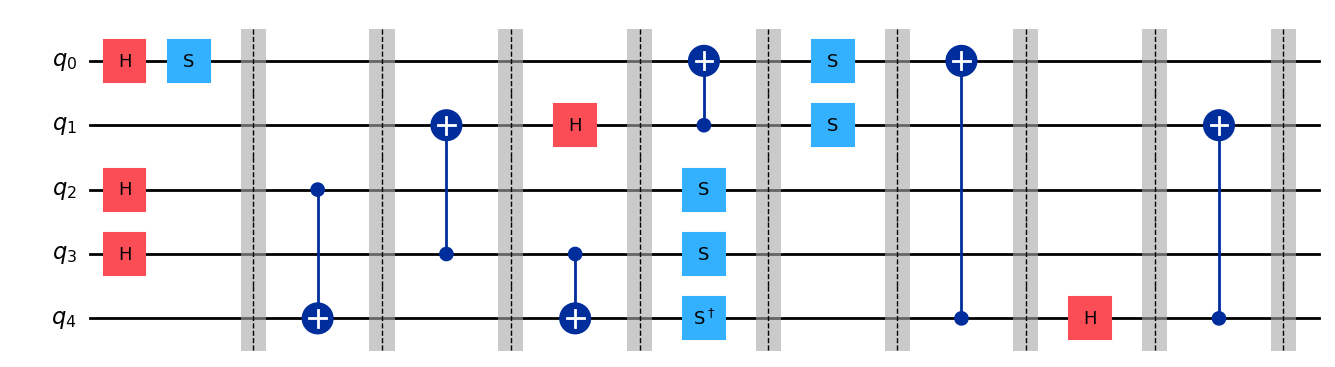

Encoded state prepared.
Initial fidelity with standard logical |+>: 1.0000000000
Introducing X (bit-flip) error on qubit 2
Syndrome bit 1: 0
Syndrome bit 2: 1
Syndrome bit 3: 0
Syndrome bit 4: 0
Measured syndrome: [0, 1, 0, 0]
No correction applied (syndrome not recognized)
Fidelity after correction: 0.0000000000
Error circuit:


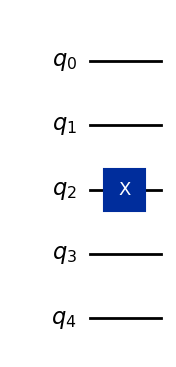

Correction circuit:


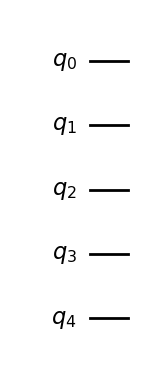

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, state_fidelity
from qiskit_aer import AerSimulator
import numpy as np
import random

# --- Encoder circuit for 5-qubit code logical |+> ---
def your_encoder():
    qc = QuantumCircuit(5)
    qc.h(0)       # Prepare |+> on qubit 0

    qc.s(0)
    qc.h(2)
    qc.h(3)
    qc.barrier()

    qc.cx(2, 4)
    qc.barrier()

    qc.cx(3, 1)
    qc.barrier()

    qc.h(1)
    qc.cx(3, 4)
    qc.barrier()

    qc.cx(1, 0)
    qc.s(2)
    qc.s(3)
    qc.sdg(4)
    qc.barrier()

    qc.s(0)
    qc.s(1)
    qc.barrier()

    qc.cx(4, 0)
    qc.barrier()

    qc.h(4)
    qc.barrier()

    qc.cx(4, 1)
    qc.barrier()

    print("Encoder circuit:")
    display(qc.draw('mpl'))
    return qc

# --- Standard 5-qubit logical |+> state (manual construction) ---
def logical_plus_state():
    logical_zero_vec = (
        Statevector.from_label('00000') +
        Statevector.from_label('10010') +
        Statevector.from_label('01001') +
        Statevector.from_label('10100') +
        Statevector.from_label('01010') -
        Statevector.from_label('11011') -
        Statevector.from_label('00110') -
        Statevector.from_label('11000') -
        Statevector.from_label('11101') -
        Statevector.from_label('00011') -
        Statevector.from_label('11110') -
        Statevector.from_label('01111') -
        Statevector.from_label('10001') -
        Statevector.from_label('01100') -
        Statevector.from_label('10111') +
        Statevector.from_label('00101')
    )

    logical_one_vec = (
        Statevector.from_label('11111') +
        Statevector.from_label('01101') +
        Statevector.from_label('10110') +
        Statevector.from_label('01011') +
        Statevector.from_label('10101') -
        Statevector.from_label('00100') -
        Statevector.from_label('11001') -
        Statevector.from_label('00111') -
        Statevector.from_label('00010') -
        Statevector.from_label('11100') -
        Statevector.from_label('00001') -
        Statevector.from_label('10000') -
        Statevector.from_label('01110') -
        Statevector.from_label('10011') -
        Statevector.from_label('01000') +
        Statevector.from_label('11010')
    )

    logical_zero = logical_zero_vec.data
    logical_zero /= np.linalg.norm(logical_zero)

    logical_one = logical_one_vec.data
    logical_one /= np.linalg.norm(logical_one)

    logical_plus = (logical_zero + logical_one) / np.sqrt(2)
    return Statevector(logical_plus)

# --- Define the 4 stabilizer generators as measurement circuits ---
def stabilizer_measure_circuits():
    # We measure each stabilizer using 1 ancilla qubit + 5 data qubits = 6 qubits total
    # Stabilizer generators (from 5-qubit code):
    # g1 = X Z Z X I
    # g2 = I X Z Z X
    # g3 = X I X Z Z
    # g4 = Z X I X Z

    # Actually the 5-qubit code stabilizers are (label qubits 0..4):
    # g1 = X Z Z X I -> X on q0, Z on q1, Z on q2, X on q3, I on q4
    # g2 = I X Z Z X -> I on q0, X on q1, Z on q2, Z on q3, X on q4
    # g3 = X I X Z Z -> X on q0, I on q1, X on q2, Z on q3, Z on q4
    # g4 = Z X I X Z -> Z on q0, X on q1, I on q2, X on q3, Z on q4

    stabilizers = [
        [('X',0), ('Z',1), ('Z',2), ('X',3), ('I',4)],
        [('I',0), ('X',1), ('Z',2), ('Z',3), ('X',4)],
        [('X',0), ('I',1), ('X',2), ('Z',3), ('Z',4)],
        [('Z',0), ('X',1), ('I',2), ('X',3), ('Z',4)]
    ]

    circuits = []
    for i, stab in enumerate(stabilizers):
        qc = QuantumCircuit(6,1)  # 5 data + 1 ancilla, 1 classical bit for measurement
        anc = 5  # ancilla qubit index

        # Prepare ancilla in |+>
        qc.h(anc)

        # Apply controlled-Pauli gates between ancilla and data qubits per stabilizer
        for (pauli, qubit) in stab:
            if pauli == 'I':
                continue
            elif pauli == 'X':
                # Controlled-X: ancilla controls X on data
                # Use H to convert X to Z basis control
                qc.h(qubit)
                qc.cx(anc, qubit)
                qc.h(qubit)
            elif pauli == 'Z':
                # Controlled-Z: just a CZ between ancilla and data
                qc.cz(anc, qubit)
            elif pauli == 'Y':
                # Y = S X Sdg, controlled-Y implemented via controlled-X and phase gates
                qc.sdg(qubit)
                qc.h(qubit)
                qc.cx(anc, qubit)
                qc.h(qubit)
                qc.s(qubit)

        qc.h(anc)
        qc.measure(anc,0)
        circuits.append(qc)
    return circuits

# --- Measure syndrome bits ---
def measure_syndrome(encoded_sv, stabilizer_circuits):
    simulator = AerSimulator()
    syndrome = []

    for i, stab_circ in enumerate(stabilizer_circuits):
        # Combine encoded state + stabilizer circuit:
        # We set data qubits state, ancilla initialized to |0>
        qc = QuantumCircuit(6,1)
        qc.initialize(encoded_sv.data, range(5))  # data qubits 0..4
        qc.compose(stab_circ, inplace=True)

        # Transpile and run
        qc = transpile(qc, simulator)
        result = simulator.run(qc, shots=1).result()
        counts = result.get_counts()
        bit = list(counts.keys())[0]  # '0' or '1'
        syndrome.append(int(bit))
        print(f"Syndrome bit {i+1}: {bit}")
    return syndrome

# --- Error correction lookup for single bit flip on one qubit ---
def syndrome_to_correction(syndrome):
    # Syndrome to qubit index (bit-flip X correction)
    # For 5-qubit code, syndrome bits uniquely identify single-qubit errors
    # Here is the syndrome table for single X error on qubits 0..4:
    syndrome_map = {
        (1,0,1,0): 0,
        (0,1,1,0): 3,
        (1,1,0,0): 2,
        (0,1,0,1): 1,
        (1,0,0,1): 4
    }
    return syndrome_map.get(tuple(syndrome), None)

# --- Apply correction X on target qubit ---
def apply_correction(qc, qubit):
    if qubit is not None:
        print(f"Applying X correction on qubit {qubit}")
        qc.x(qubit)
    else:
        print("No correction applied (syndrome not recognized)")

# --- Main flow ---
def main():
    # Step 1: Encode logical |+> state
    encoder = your_encoder()
    encoded_sv = Statevector.from_instruction(encoder)
    print("Encoded state prepared.")

    # Step 2: Reference logical |+> from manual construction
    logical_plus = logical_plus_state()
    initial_fid = state_fidelity(encoded_sv, logical_plus)
    print(f"Initial fidelity with standard logical |+>: {initial_fid:.10f}")

    # Step 3: Introduce random bit flip error on one qubit
    error_qubit = random.randint(0,4)
    print(f"Introducing X (bit-flip) error on qubit {error_qubit}")
    error_circuit = QuantumCircuit(5)
    error_circuit.x(error_qubit)
    errored_sv = encoded_sv.evolve(error_circuit)

    # Step 4: Measure syndrome
    stabilizer_circuits = stabilizer_measure_circuits()
    syndrome = measure_syndrome(errored_sv, stabilizer_circuits)
    print(f"Measured syndrome: {syndrome}")

    # Step 5: Correct error based on syndrome
    correction_circuit = QuantumCircuit(5)
    corr_qubit = syndrome_to_correction(syndrome)
    apply_correction(correction_circuit, corr_qubit)

    # Step 6: Apply correction to errored state
    corrected_sv = errored_sv.evolve(correction_circuit)
    corrected_fid = state_fidelity(corrected_sv, logical_plus)
    print(f"Fidelity after correction: {corrected_fid:.10f}")

    # Draw circuits for visualization
    print("Error circuit:")
    display(error_circuit.draw('mpl'))
    print("Correction circuit:")
    display(correction_circuit.draw('mpl'))

if __name__ == "__main__":
    main()


In [11]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector, state_fidelity
import numpy as np
import random

from qiskit import transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


# --- Encoder circuit for logical |+⟩ ---
def your_encoder():
    qc = QuantumCircuit(5)
    qc.h(0)
    qc.s(0)
    qc.h(2)
    qc.h(3)
    qc.barrier()
    qc.cx(2, 4)
    qc.barrier()
    qc.cx(3, 1)
    qc.barrier()
    qc.h(1)
    qc.cx(3, 4)
    qc.barrier()
    qc.cx(1, 0)
    qc.s(2)
    qc.s(3)
    qc.sdg(4)
    qc.barrier()
    qc.s(0)
    qc.s(1)
    qc.barrier()
    qc.cx(4, 0)
    qc.barrier()
    qc.h(4)
    qc.barrier()
    qc.cx(4, 1)
    qc.barrier()
    return qc

# --- True logical |+⟩ state from standard construction ---
def logical_plus_state():
    logical_zero_vec = (
        Statevector.from_label('00000') +
        Statevector.from_label('10010') +
        Statevector.from_label('01001') +
        Statevector.from_label('10100') +
        Statevector.from_label('01010') -
        Statevector.from_label('11011') -
        Statevector.from_label('00110') -
        Statevector.from_label('11000') -
        Statevector.from_label('11101') -
        Statevector.from_label('00011') -
        Statevector.from_label('11110') -
        Statevector.from_label('01111') -
        Statevector.from_label('10001') -
        Statevector.from_label('01100') -
        Statevector.from_label('10111') +
        Statevector.from_label('00101')
    )

    logical_one_vec = (
        Statevector.from_label('11111') +
        Statevector.from_label('01101') +
        Statevector.from_label('10110') +
        Statevector.from_label('01011') +
        Statevector.from_label('10101') -
        Statevector.from_label('00100') -
        Statevector.from_label('11001') -
        Statevector.from_label('00111') -
        Statevector.from_label('00010') -
        Statevector.from_label('11100') -
        Statevector.from_label('00001') -
        Statevector.from_label('10000') -
        Statevector.from_label('01110') -
        Statevector.from_label('10011') -
        Statevector.from_label('01000') +
        Statevector.from_label('11010')
    )

    logical_zero = logical_zero_vec.data / np.linalg.norm(logical_zero_vec.data)
    logical_one = logical_one_vec.data / np.linalg.norm(logical_one_vec.data)

    logical_plus = (logical_zero + logical_one) / np.sqrt(2)
    return Statevector(logical_plus)

# Syndrome measurement circuit (stabilizer measurements)
def syndrome_measurement():
    qc = QuantumCircuit(5, 4)
    qc.barrier()
    # Syndrome extraction for the 5-qubit code stabilizers
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(0, 2)
    qc.cx(0, 3)
    qc.cx(0, 4)
    qc.h(0)
    qc.measure(0, 0)

    qc.h(1)
    qc.cx(1, 0)
    qc.cx(1, 2)
    qc.cx(1, 3)
    qc.cx(1, 4)
    qc.h(1)
    qc.measure(1, 1)

    qc.h(2)
    qc.cx(2, 0)
    qc.cx(2, 1)
    qc.cx(2, 3)
    qc.cx(2, 4)
    qc.h(2)
    qc.measure(2, 2)

    qc.h(3)
    qc.cx(3, 0)
    qc.cx(3, 1)
    qc.cx(3, 2)
    qc.cx(3, 4)
    qc.h(3)
    qc.measure(3, 3)

    return qc

# Syndrome lookup table for bit-flip errors
def build_syndrome_table():
    # Map: syndrome (as bit string) -> qubit to correct
    return {
        '0000': None,
        '1000': 0,
        '0100': 1,
        '0010': 2,
        '0001': 3,
        '1110': 4
        # Extend this table as needed for full Pauli errors
    }


# Inject a random bit-flip error
def apply_random_bitflip(statevec, num_qubits=5):
    error_qubit = random.randint(0, num_qubits - 1)
    print(f"\nApplying X (bit-flip) error on qubit {error_qubit}")
    qc = QuantumCircuit(num_qubits)
    qc.x(error_qubit)
    errored_state = statevec.evolve(qc)
    return errored_state, error_qubit

# Extract syndrome
def extract_syndrome(state):
    sim = Aer.get_backend('aer_simulator')
    circ = syndrome_measurement()
    circ = transpile(circ, sim)
    circ.set_initial_state(state)
    result = sim.run(circ, shots=1).result()
    counts = result.get_counts()
    syndrome = list(counts.keys())[0]
    print(f"Syndrome measurement result: {syndrome}")
    return syndrome

# Correction table: mapping syndrome bits to corrective X operations
correction_table = {
    '000': None,     # No error
    '100': 0,
    '010': 1,
    '001': 2,
    '110': 3,
    '101': 4
}

def correct_error(syndrome, statevec):
    if syndrome not in correction_table or correction_table[syndrome] is None:
        print("No correction needed.")
        return statevec

    qubit_to_correct = correction_table[syndrome]
    print(f"Applying correction: X on qubit {qubit_to_correct}")
    correction_circ = QuantumCircuit(5)
    correction_circ.x(qubit_to_correct)
    return statevec.evolve(correction_circ)

# MAIN EXECUTION
# Step 1: Encode
encoder = your_encoder()
encoded_state = Statevector.from_instruction(encoder)
print("Encoded logical |+⟩ state.")
encoder.draw('mpl')
plt.show()

# Step 2: Compare fidelity with ideal
ideal_logical_plus = logical_plus_state()
initial_fidelity = state_fidelity(encoded_state, ideal_logical_plus)
print(f"\nInitial fidelity with logical |+>: {initial_fidelity:.10f}")

# Step 3: Inject error
errored_state, flipped_qubit = apply_random_bitflip(encoded_state)

# Step 4: Syndrome measurement
syndrome = extract_syndrome(errored_state)

# Step 5: Apply correction
corrected_state = correct_error(syndrome, errored_state)

# Step 6: Final fidelity
final_fidelity = state_fidelity(corrected_state, ideal_logical_plus)
print(f"\nFinal fidelity after correction: {final_fidelity:.10f}")



Encoded logical |+⟩ state.

Initial fidelity with logical |+>: 1.0000000000

Applying X (bit-flip) error on qubit 2


AttributeError: 'QuantumCircuit' object has no attribute 'set_initial_state'